# COVID-19-Portugal - Last 60 Days Daily Evolution  

<div style="float:right; a.color: grey;">
        <a href="https://github.com/matosdotnet">
        <img src="https://avatars3.githubusercontent.com/u/64945038?s=60&v=4">
        matosdotnet
    </a>
</div>

<ul> 
        <li>New Cases</li>
        <li>New Deaths</li>
        <li>New Suspects</li>
        <li>New Recovered</li>
      </ul>
       Data Source: 
        <a href="https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv">https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv</a>
       <br/>
Ref:
        <a href="https://covid19.min-saude.pt/relatorio-de-situacao/">DGS Reports<a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
%matplotlib inline

# Define the last number of days here
nr_last_days = 60
s_title = 'COVID-19 Portugal'
s_url = 'https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv'
s_local_snapshot_path = 'data-pt.csv'

In [2]:
#define dictionaries with metadata
d_confirmations = {'key' : 'confirmados', 'label' : 'Cases', 'color' : '#00D0FE'}
d_new_confirmations = {'key' : 'confirmados_novos', 'label' : 'New Cases', 'color' : '#00D0FE'}

d_deaths = {'key' : 'obitos', 'label' : 'Deaths', 'color' : '#FE0004'}
d_new_deaths = {'key' : 'obitos_novos', 'label' : 'New Deaths', 'color' : '#FE0004'}

d_suspects = {'key' : 'suspeitos', 'label' : 'Suspects', 'color' : '#FE6C00'}
d_new_suspects = {'key' : 'suspeitos_novos', 'label' : 'New Suspects', 'color' : '#FE6C00'}

d_recoveries = {'key' : 'recuperados', 'label' : 'Recoveries', 'color' : '#7FFE00'}
d_new_recoveries = {'key' : 'recuperados_novos', 'label' : 'New Recoveries', 'color' : '#7FFE00'}

d_icu = {'key' : 'internados_uci', 'label' : 'ICU Patients', 'color' : '#FEFE00'}
d_new_icu = {'key' : 'internados_uci_novos', 'label' : 'New ICU Patients', 'color' : '#FEFE00'}

d_active = {'key' : 'active', 'label' : 'Active', 'color' : '#FE0004'}
d_new_active = {'key' : 'active_new', 'label' : 'New Active', 'color' : '#FE00F6'}

In [3]:
def read_data_remote() : 
     # Read Source Data
    df_full = pd.read_csv(s_url)
    # Manage Dates Formating and Set Index
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y'))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x,format='%d-%m-%Y %H:%M'))
    df_full = df_full.set_index('data_dados')
    
    #Active
    df_full[d_active['key']] = df_full[d_confirmations['key']] - df_full[d_recoveries['key']]- df_full[d_deaths['key']]
    # New Deaths 
    df_full[d_new_deaths['key']] = df_full[d_deaths['key']].diff()
    # New Recovered
    df_full[d_new_recoveries['key']] = df_full[d_recoveries['key']].diff()
    # New Suspects
    df_full[d_new_suspects['key']] = df_full[d_suspects['key']].diff()
    #New ICU Patients
    df_full[d_new_icu['key']] = df_full[d_icu['key']].diff()
    #New Active
    df_full[d_new_active['key']] = df_full[d_active['key']].diff()
    # Save a snapshot
    df_full.to_csv(s_local_snapshot_path)
    return df_full
    
def read_data_local() : 
    df_full = pd.read_csv(s_local_snapshot_path)
    df_full['data'] = df_full['data'].apply(lambda x : pd.to_datetime(x))
    df_full['data_dados'] = df_full['data_dados'].apply(lambda x : pd.to_datetime(x))
    df_full = df_full.set_index('data_dados')
    return df_full
    
def read_data() : 
    df_full = pd.DataFrame()
    try:
        df_full = read_data_remote()
    except:
        df_full = read_data_local()
        print("An exception occurred reading data from {}\nAlternatively the latest Snapshot from {} was retrieved.".format(s_url,df_full.index.max()))
    else:
         print("Data collected sucessfully from {}\nMax data set date: {}".format(s_url,df_full.index.max()))          
    return df_full

In [4]:
#Read Data
df_full  = read_data()
# Slice the last days
df_latest = df_full.tail(nr_last_days )

Data collected sucessfully from https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv
Max data set date: 2020-05-27 00:00:00


In [5]:
df_latest[[d_confirmations['key'],d_new_confirmations['key'],d_deaths['key'],d_new_deaths['key'],d_suspects['key'],d_new_suspects['key'],d_recoveries['key'],d_new_recoveries['key'],d_icu['key'],d_new_icu['key'],d_new_active['key']]].tail(1)

,confirmados,confirmados_novos,obitos,obitos_novos,suspeitos,suspeitos_novos,recuperados,recuperados_novos,internados_uci,internados_uci_novos,active_new
data_dados,,,,,,,,,,,
2020-05-27,31292,285,1356,14.0,316364,2478.0,18349,253.0,66.0,-5.0,18.0


In [6]:
# Last X count days overall description
df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_icu['key'],d_new_active['key']]].describe()

,confirmados_novos,obitos_novos,suspeitos_novos,recuperados_novos,internados_uci_novos,active_new
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,435.366667,20.933333,4726.833333,305.100000,-0.383333,109.333333
std,273.205018,8.323678,3624.937125,1286.351386,13.973451,1362.477774
min,92.000000,6.000000,161.000000,0.000000,-40.000000,-9706.000000
25%,222.000000,14.000000,2643.750000,11.750000,-7.000000,114.500000
50%,369.500000,20.000000,3775.500000,40.000000,-3.000000,260.500000
75%,611.750000,27.250000,6300.500000,138.500000,3.000000,544.750000
max,1516.000000,37.000000,24893.000000,9844.000000,49.000000,1462.000000


In [7]:
def line_plot_df_tindex(y,data,title,ylabel,ycolor,window_span=7,bollinger_type='EMA'):
    '''
    bollinger_type: 
                    'EMA' Exponential moving average
                    'MA' Moving average
    '''
    #Mean ans Standar Deviations
    v_mean = data[y].mean()
    v_std =  data[y].std()
    
    v_df_averages    = pd.Series([], dtype= 'float64')
    v_df_upper_stds  = pd.Series([], dtype= 'float64')
    v_df_lower_stds  = pd.Series([], dtype= 'float64')
    
    if bollinger_type == 'MA': 
        v_df_averages = data[y].rolling(window=window_span).mean()
        v_df_upper_stds = v_df_averages + 2*data[y].rolling(window=window_span).std()
        v_df_lower_stds = v_df_averages - 2*data[y].rolling(window=window_span).std()
    elif bollinger_type == 'EMA': 
        v_df_averages = data[y].ewm(span=window_span).mean()
        v_df_upper_stds = v_df_averages + 2*data[y].ewm(span=window_span).std()
        v_df_lower_stds = v_df_averages - 2*data[y].ewm(span=window_span).std()
    else :
        return 0
    
    #Set Style
    sns.set_style('darkgrid', 
              {
                  'axes.facecolor': '#646666',
                  'figure.facecolor': '#646666',
                  'grid.color': 'lightgrey',
                  'grid.linestyle': 'dotted',
                  'xtick.color': 'white',
                  'xtick.top': False,
                  'xtick.bottom': True,
                  'ytick.color': 'white',
                  'ytick.left': True,
                  'ytick.right': False,
                  'axes.labelcolor': 'white',
                  'axes.spines.top': False,
                  'axes.spines.right': False,
                  'text.color': 'white'
                  
              })
 
    #Set Fig Size
    fig = plt.figure(figsize=(12,5))

    ax = sns.lineplot(x=data.index,y=v_df_averages
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    #Line Plots for Mean and Standard Deviation
    ax = sns.lineplot(x=data.index,y=v_df_upper_stds
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    
    ax.lines[1].set_linestyle('dotted')    
    ax = sns.lineplot(x=data.index,y=v_df_lower_stds
                      ,color = '#5CFE00'
                      ,alpha = 0.2        
                      ,dashes=True
                     # ,estimator = 'mean'
                     )
    ax.lines[2].set_linestyle('dotted')
    
    #Line Plot with data

    ax = sns.lineplot(x=data.index,y=data[y]
                      ,marker=True
                      ,markers=["o", "o"]
                      ,alpha = 0.5
                      ,dashes=False
                      ,style=True
                      ,hue = 1
                      ,palette = [ycolor]
                     # ,estimator = 'mean'
                     )

    # Rerieve Max, Min and Latest
    y_max = data[y].max()
    x_max = data[[y]].idxmax()[0]
    y_min = data[y].min()
    x_min = data[[y]].idxmin()[0]
    y_mean = y_max+y_max*0.10
    x_mean = data[[y]].index[0]
    x_latest =  data.index.max()
    y_latest = data[x_latest:x_latest][y][0]

    # Slice the chart canvas
    ax.set_xlim(data.index.min(), data.index.max()+datetime.timedelta(days=1))
      
    if y_min >= 0 :
        ax.set_ylim(0, y_max+y_max*0.10)
    else :
        ax.set_ylim(y_min+y_min*0.10, y_max+y_max*0.10)

    #Set Date Format
    str_date_format = '%d/%m'

    #Anotattions for Max, Min and Latest
    lbl_y_offset = 0.02*y_max
    lbl_y_max_offset = 0.02*y_max
    lbl_y_min_offset = 0.02*y_min

    ax.annotate('  MAX: {0:.0f} \n {1}'.format(y_max,x_max.strftime(str_date_format))
                ,xy=(x_max,y_max)
                ,xytext=(x_max,y_max+lbl_y_max_offset)
                ,ha='center')
    
    if (x_min != x_max) :
        ax.annotate('  MIN: {0:.0f} \n {1}'.format(y_min,x_min.strftime(str_date_format))
                ,xy=(x_min,y_min)
                ,xytext=(x_min,y_min+lbl_y_min_offset)
                ,ha='center')

    if (x_latest != x_max) and (x_latest!= x_min) :
        ax.annotate('  {0:.0f} \n {1}'.format(y_latest,x_latest.strftime(str_date_format))
                ,xy=(x_latest,y_latest)
                ,xytext=(x_latest,y_latest+lbl_y_offset)
                ,ha='center')
    
    plt.figtext(0.1, 0.05,'x̄: {0:.1f} σ: {1:.1f} : {2}[x̄ +- 2σ] N={3:.0f}'.format(v_mean,v_std,bollinger_type,window_span)
               #,ha='right'
               ,color='#5CFE00') 
    
    #Axis and Labels formating
    ax.set_title(title)
    
    #Make sure the dataset has continuous dates in the DataFrame
    ax.set_xlabel('Last {0} days'.format(len(data.index)))
    ax.set_ylabel(ylabel)

    myFmt = mdates.DateFormatter(str_date_format)
    ax.xaxis.set_major_formatter(myFmt)
    ax.legend().remove()

    # Fill Area
    plt.fill_between( data.index, data[y], color=ycolor, alpha=0.2)
    
    #fig.savefig("{}.png".format(title),bbox_inches = 'tight', dpi=plt.gcf().dpi,facecolor='#646666')
    fig.savefig("{}.png".format(title),bbox_inches = 'tight', dpi=300,facecolor='#646666')
    
    plt.show()

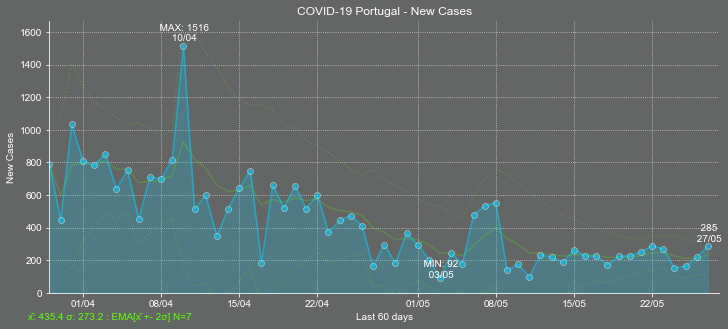

In [8]:
#from MatosDotNetStandardCharts import line_plot_df_tindex 
line_plot_df_tindex(
                d_new_confirmations['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_confirmations['label'])
                ,ylabel=d_new_confirmations['label']
                ,ycolor=d_new_confirmations['color']
               )

In [9]:
# Trace outstanding vales
df_latest[[d_confirmations['key'],d_new_confirmations['key']]]['2020-04-09':'2020-04-11']

,confirmados,confirmados_novos
data_dados,,
2020-04-09,13956,815
2020-04-10,15472,1516
2020-04-11,15987,515


<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/39_DGS_boletim_20200410.pdf">Relatório de Situação nº 039 | 10/04/2020</a>
<br/>
    <a href="https://www.publico.pt/2020/04/10/sociedade/noticia/covid19-ha-26-mortes-1516-infectados-portugal-1911826">Covid-19: há mais 26 mortes e mais 1516 infectados em Portugal<a/>
    <br/>
    <a href="https://www.jornaldenegocios.pt/economia/coronavirus/detalhe/morreram-mais-26-pessoas-em-portugal-com-covid-19-e-casos-confirmados-aumentam-mais-de-10">Morreram mais 26 pessoas em Portugal com covid-19 e casos confirmados aumentam mais de 10%</a>

In [10]:
df_latest[[d_confirmations['key'],d_new_confirmations['key']]]['2020-05-01':'2020-05-02']

,confirmados,confirmados_novos
data_dados,,
2020-05-01,24987,295
2020-05-02,25190,203


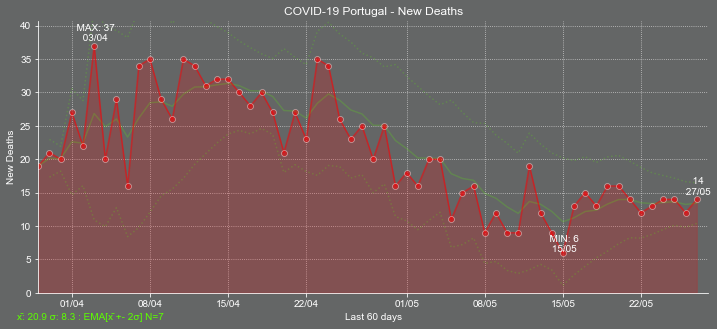

In [11]:
line_plot_df_tindex(
                d_new_deaths['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_deaths['label'])
                ,ylabel=d_new_deaths['label']
                ,ycolor=d_new_deaths['color']
               )

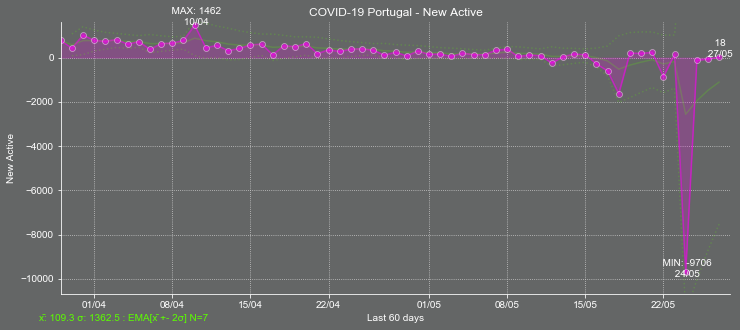

In [12]:
line_plot_df_tindex(
                d_new_active['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_active['label'])
                ,ylabel=d_new_active['label']
                ,ycolor=d_new_active['color']
               )

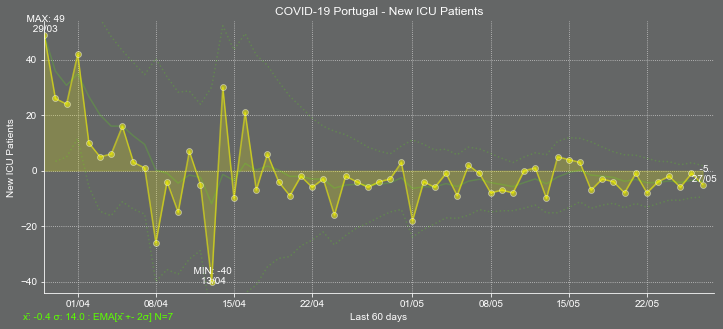

In [13]:
line_plot_df_tindex(
                d_new_icu['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_icu['label'])
                ,ylabel=d_new_icu['label']
                ,ycolor=d_new_icu['color']
               )

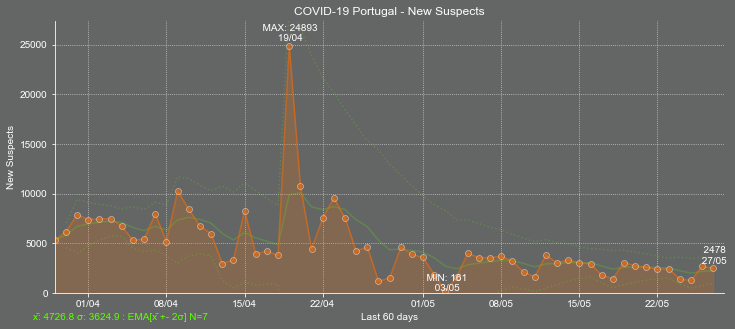

In [14]:
line_plot_df_tindex(
                d_new_suspects['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_suspects['label'])
                ,ylabel=d_new_suspects['label']
                ,ycolor=d_new_suspects['color']
               )

In [15]:
# Trace outstanding vales
df_latest[[d_suspects['key'],d_new_suspects['key']]]['2020-04-18':'2020-04-20']

,suspeitos,suspeitos_novos
data_dados,,
2020-04-18,162711,3771.0
2020-04-19,187604,24893.0
2020-04-20,198353,10749.0


<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/04/48_DGS_boletim_20200419.pdf">Relatório de Situação nº 048 | 19/04/2020</a> 
<br/>
    <a href="https://rr.sapo.pt/2020/04/22/pais/dgs-explica-aumento-de-35-mil-casos-suspeitos-com-atraso-nas-notificacoes/noticia/190207/">DGS explica aumento de 35 mil casos suspeitos com atraso nas notificações - Renascença<a/>
    <br/>
    <a href="https://rr.sapo.pt/2020/04/20/pais/mais-35-mil-casos-suspeitos-em-48-horas-dgs-explica-o-metodo-mas-nao-a-variacao/noticia/189916/">Mais 35 mil casos suspeitos em 48 horas? DGS explica o método, mas não a variação</a>

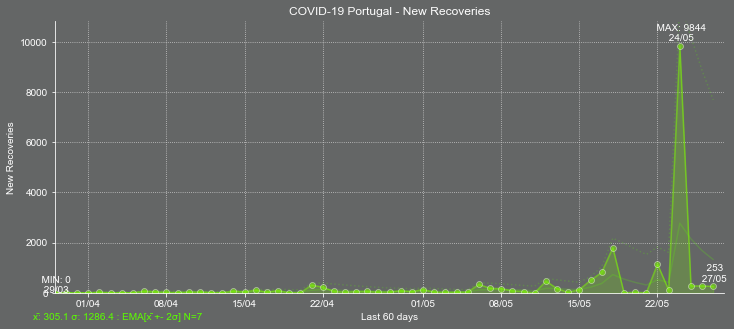

In [16]:
line_plot_df_tindex(
                d_new_recoveries['key']
                ,data=df_latest
                ,title='{} - {}'.format(s_title,d_new_recoveries['label'])
                ,ylabel=d_new_recoveries['label']
                ,ycolor=d_new_recoveries['color']
               )

In [17]:
# Trace outstanding vales
df_latest[[d_recoveries['key'],d_new_recoveries['key']]]['2020-05-17':'2020-05-24']

,recuperados,recuperados_novos
data_dados,,
2020-05-17,4636,814.0
2020-05-18,6430,1794.0
2020-05-19,6431,1.0
2020-05-20,6452,21.0
2020-05-21,6452,0.0
2020-05-22,7590,1138.0
2020-05-23,7705,115.0
2020-05-24,17549,9844.0


<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/05/83_DGS_boletim_20200524.pdf">Relatório de Situação nº 083 | 24/05/2020</a>
<br/>
<a href="https://rr.sapo.pt/2020/05/24/pais/balanco-dgs-quase-10-mil-novas-recuperacoes-num-dia/noticia/194014/">Balanço DGS. Quase 10 mil novas recuperações num dia<a/>


<a href="https://covid19.min-saude.pt/wp-content/uploads/2020/05/77_DGS_boletim_20200518.pdf">Relatório de Situação nº 077 | 18/05/2020</a>
<br/>
<a href="https://www.rtp.pt/noticias/pais/forte-subida-de-recuperados-deve-se-as-instituicoes-reportarem-mais-dgs_n1229822">Forte subida de recuperados deve-se às instituições reportarem mais - DGS<a/>

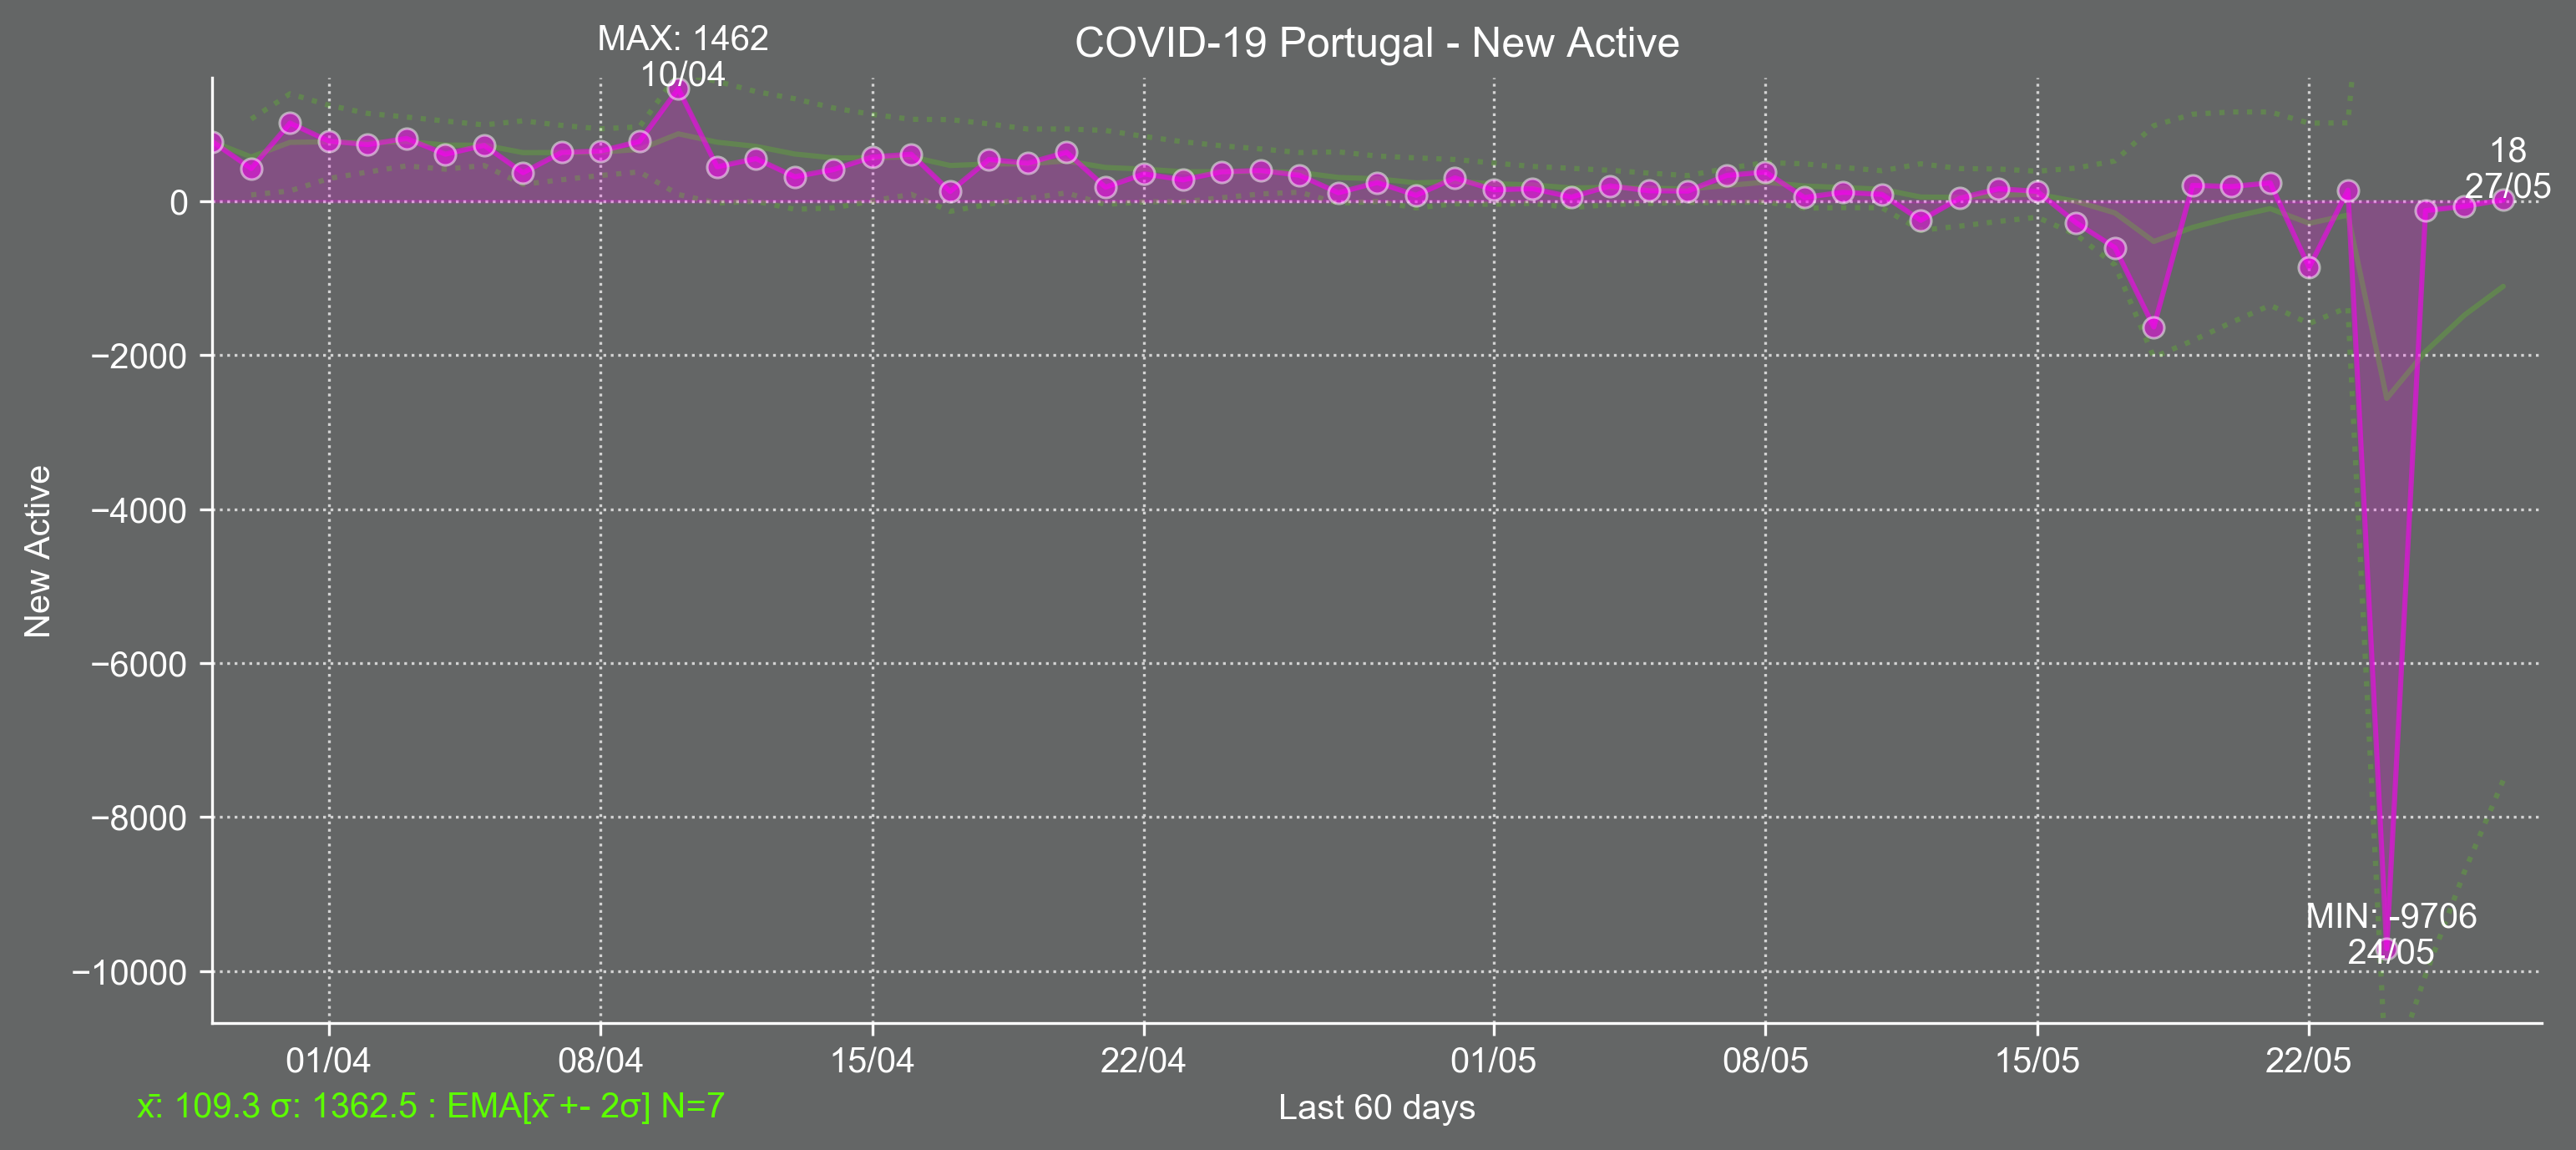

COVID-19 Portugal - New Active.png


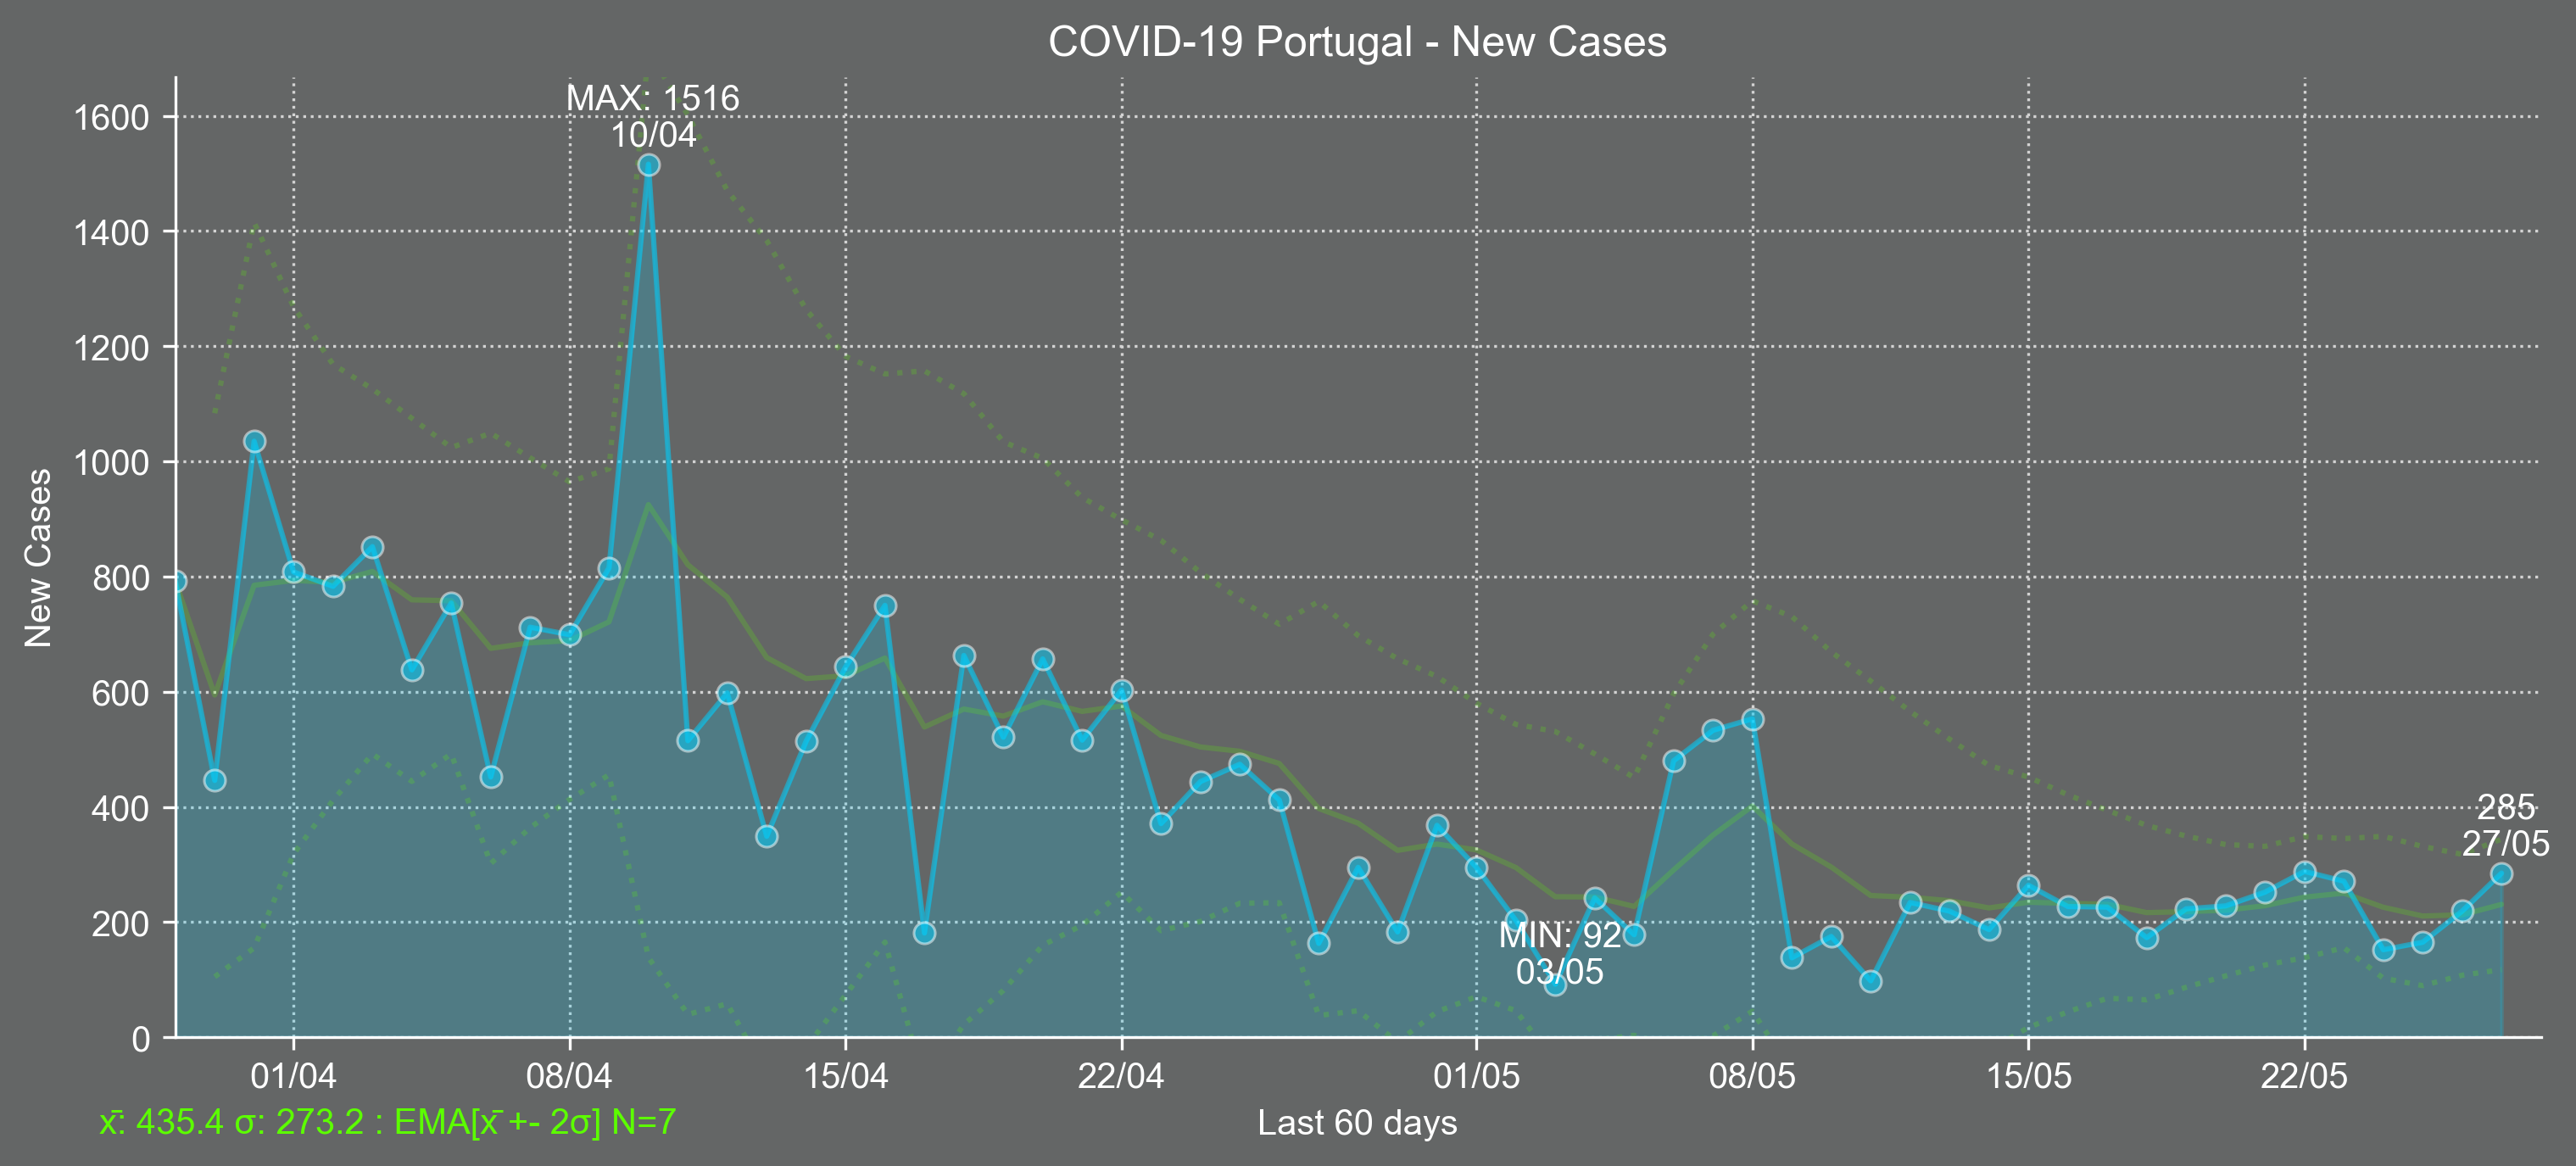

COVID-19 Portugal - New Cases.png


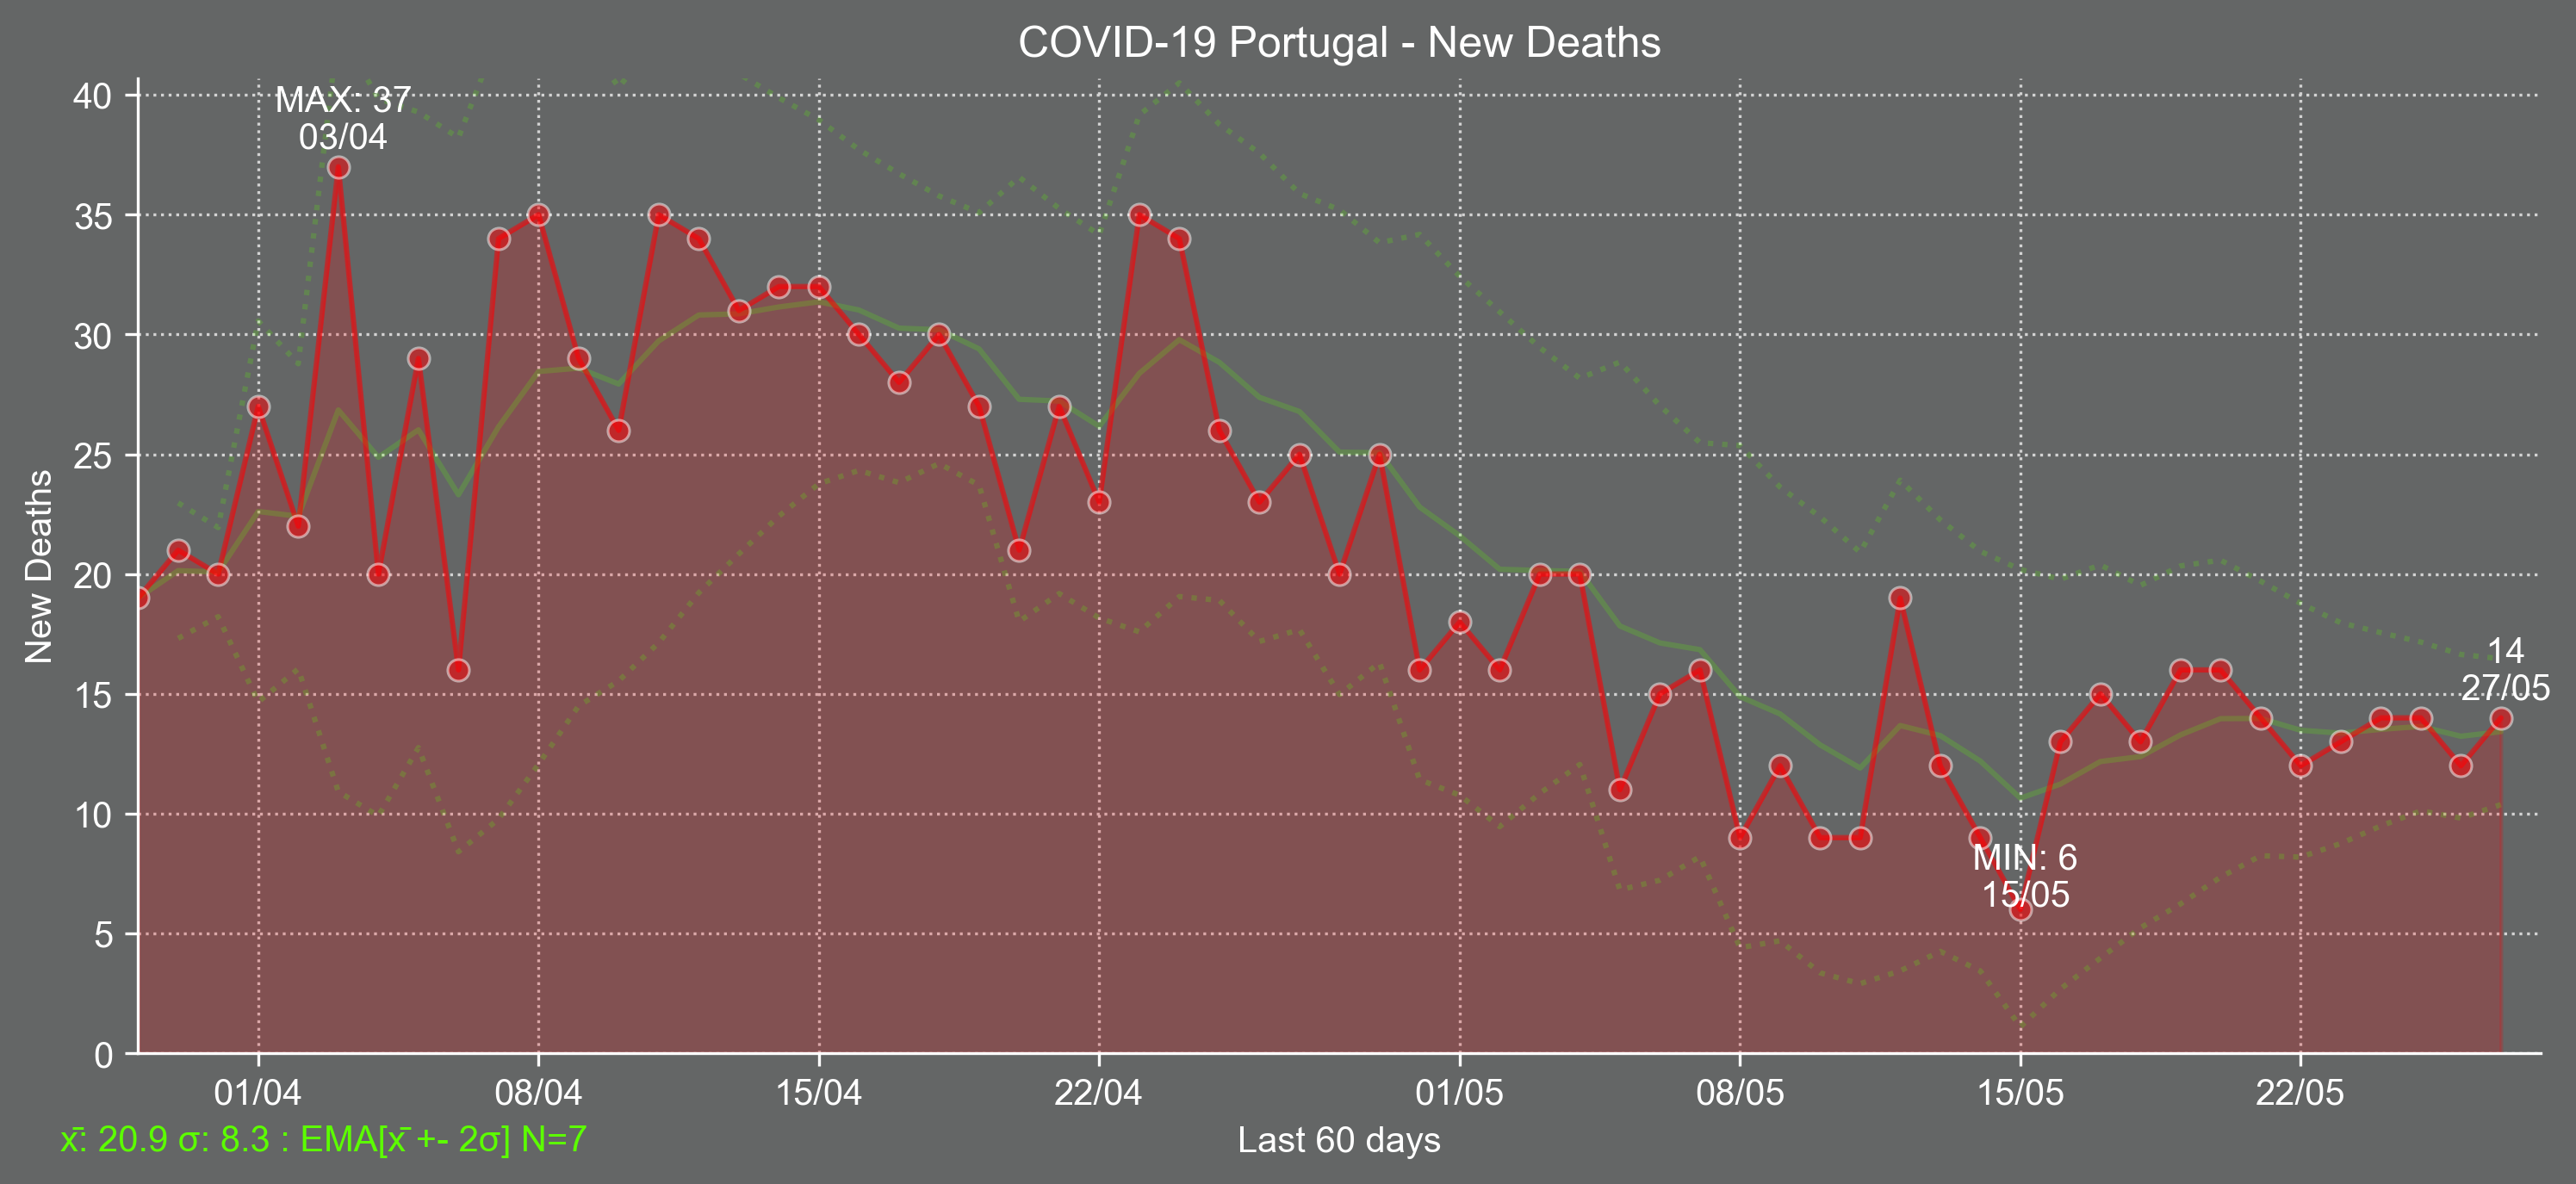

COVID-19 Portugal - New Deaths.png


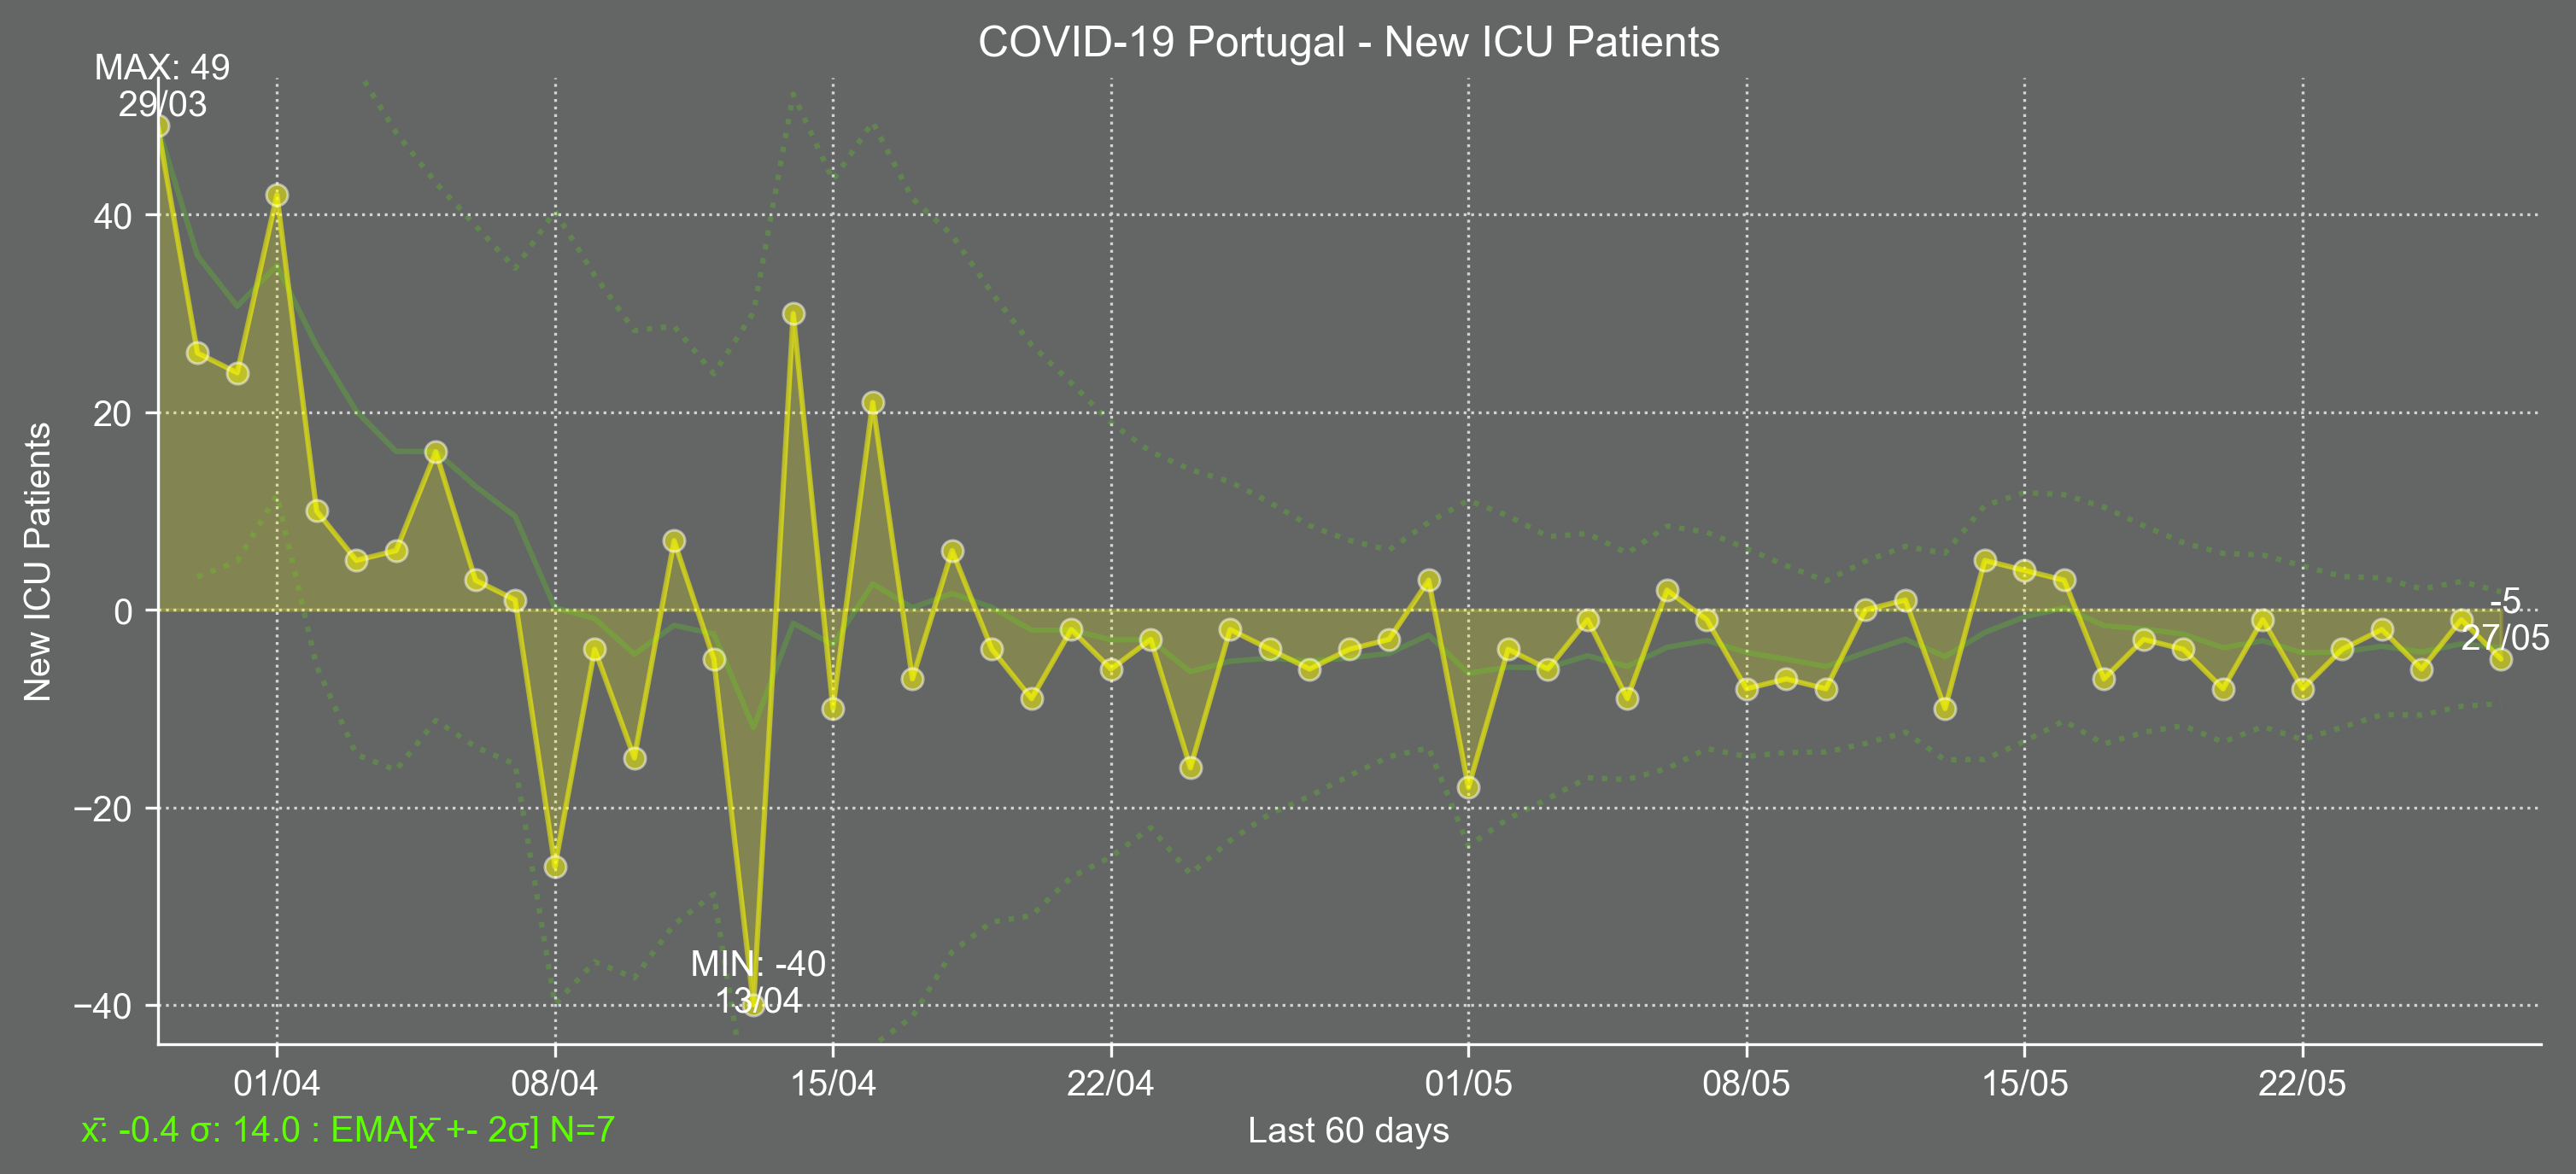

COVID-19 Portugal - New ICU Patients.png


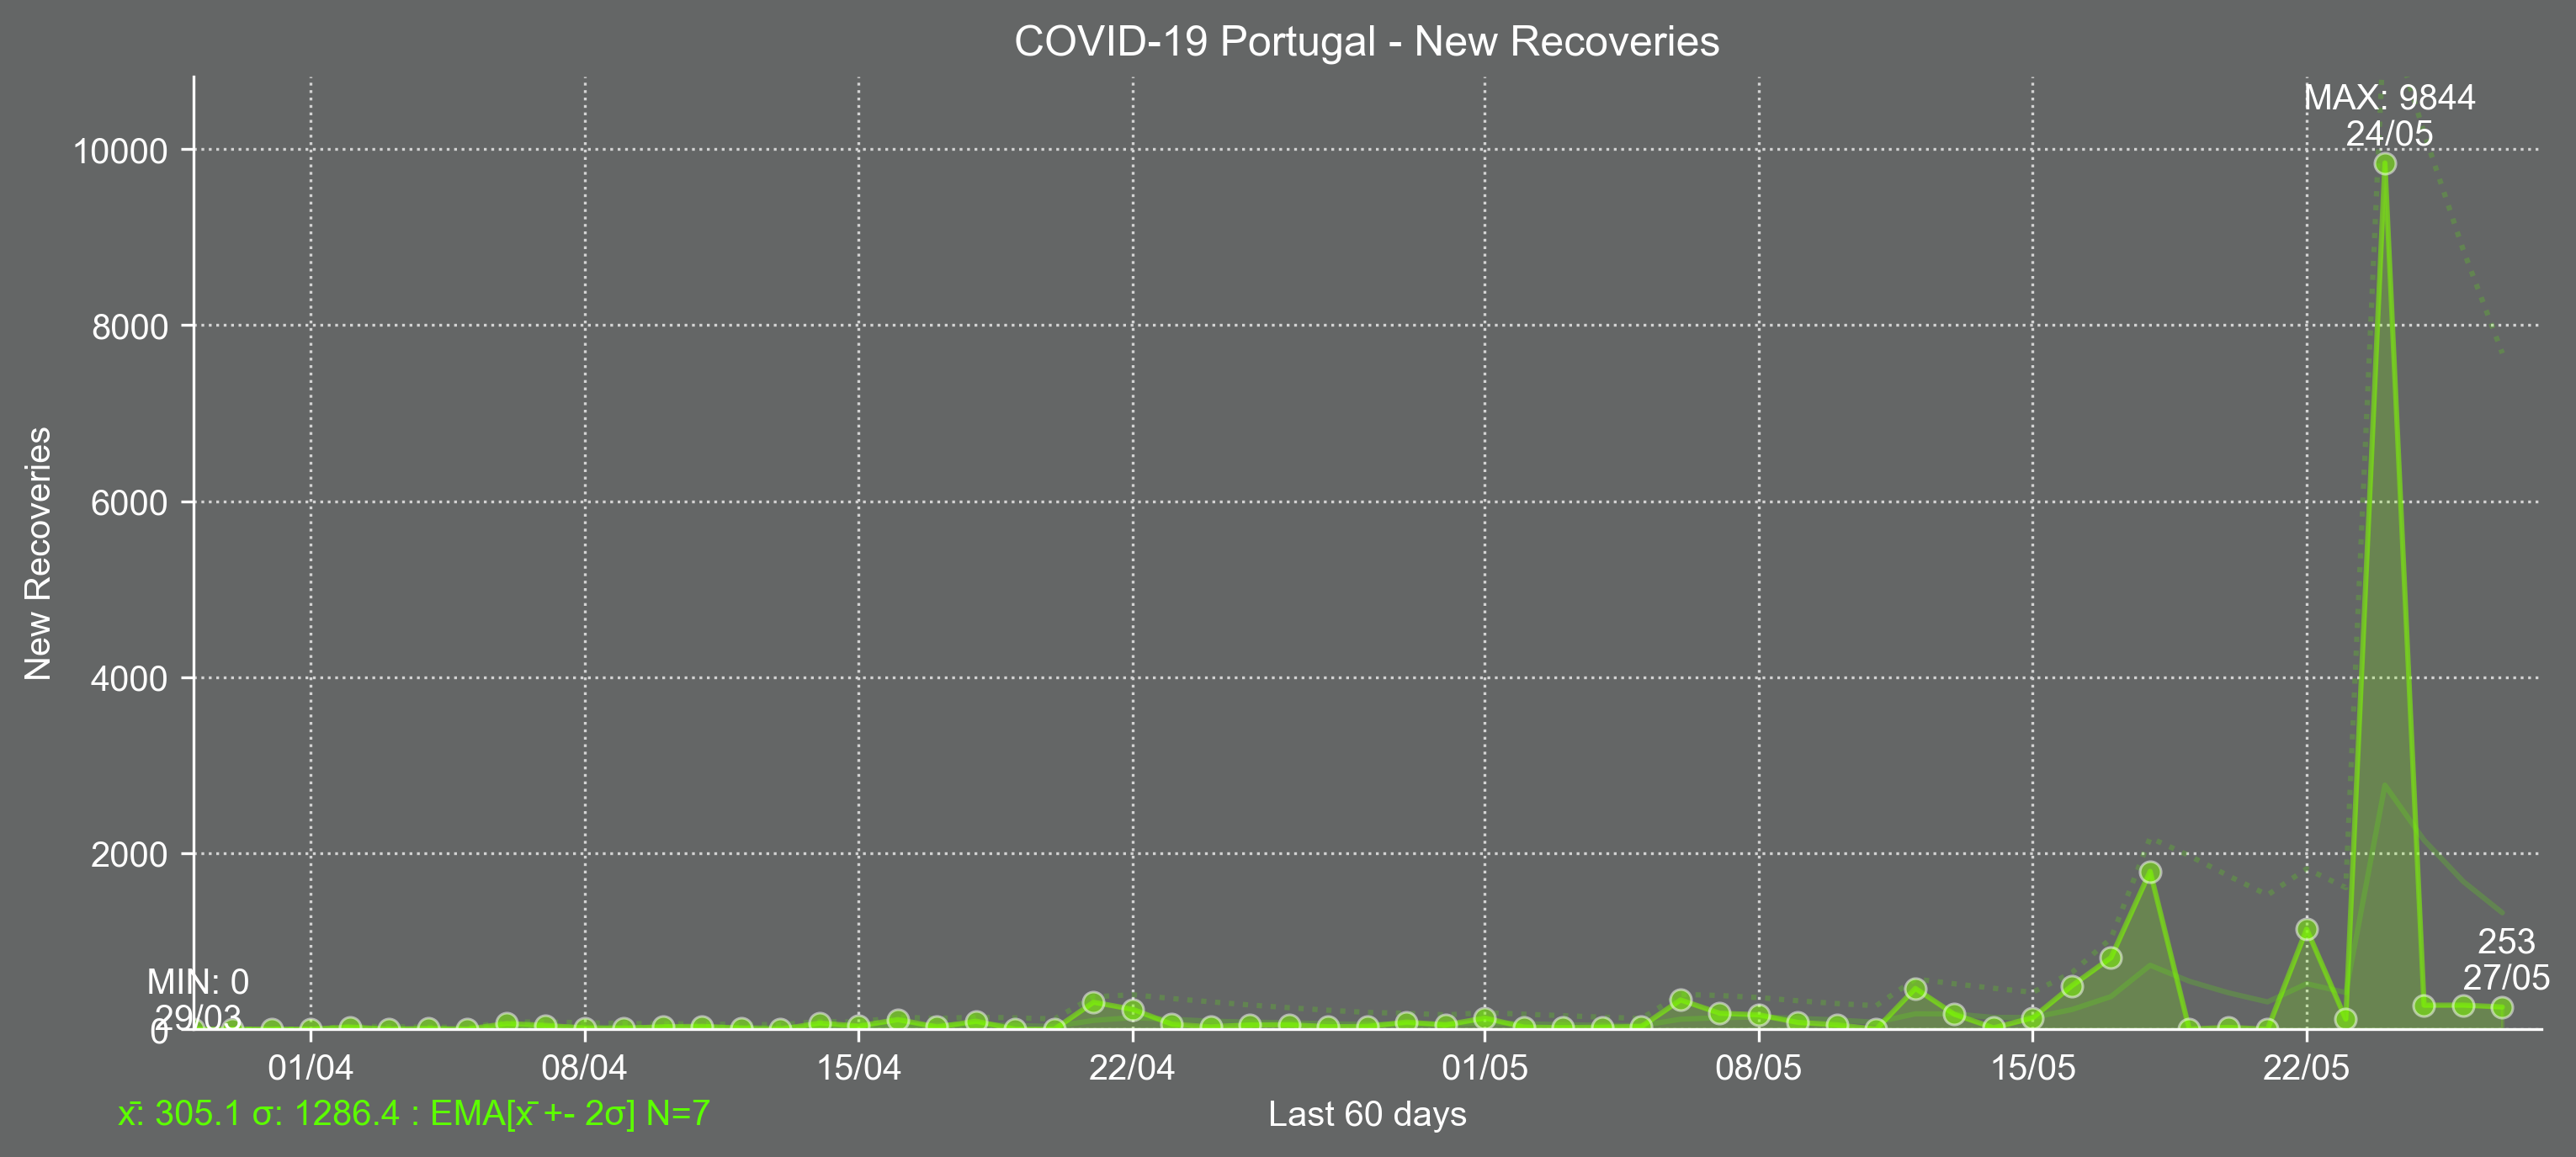

COVID-19 Portugal - New Recoveries.png


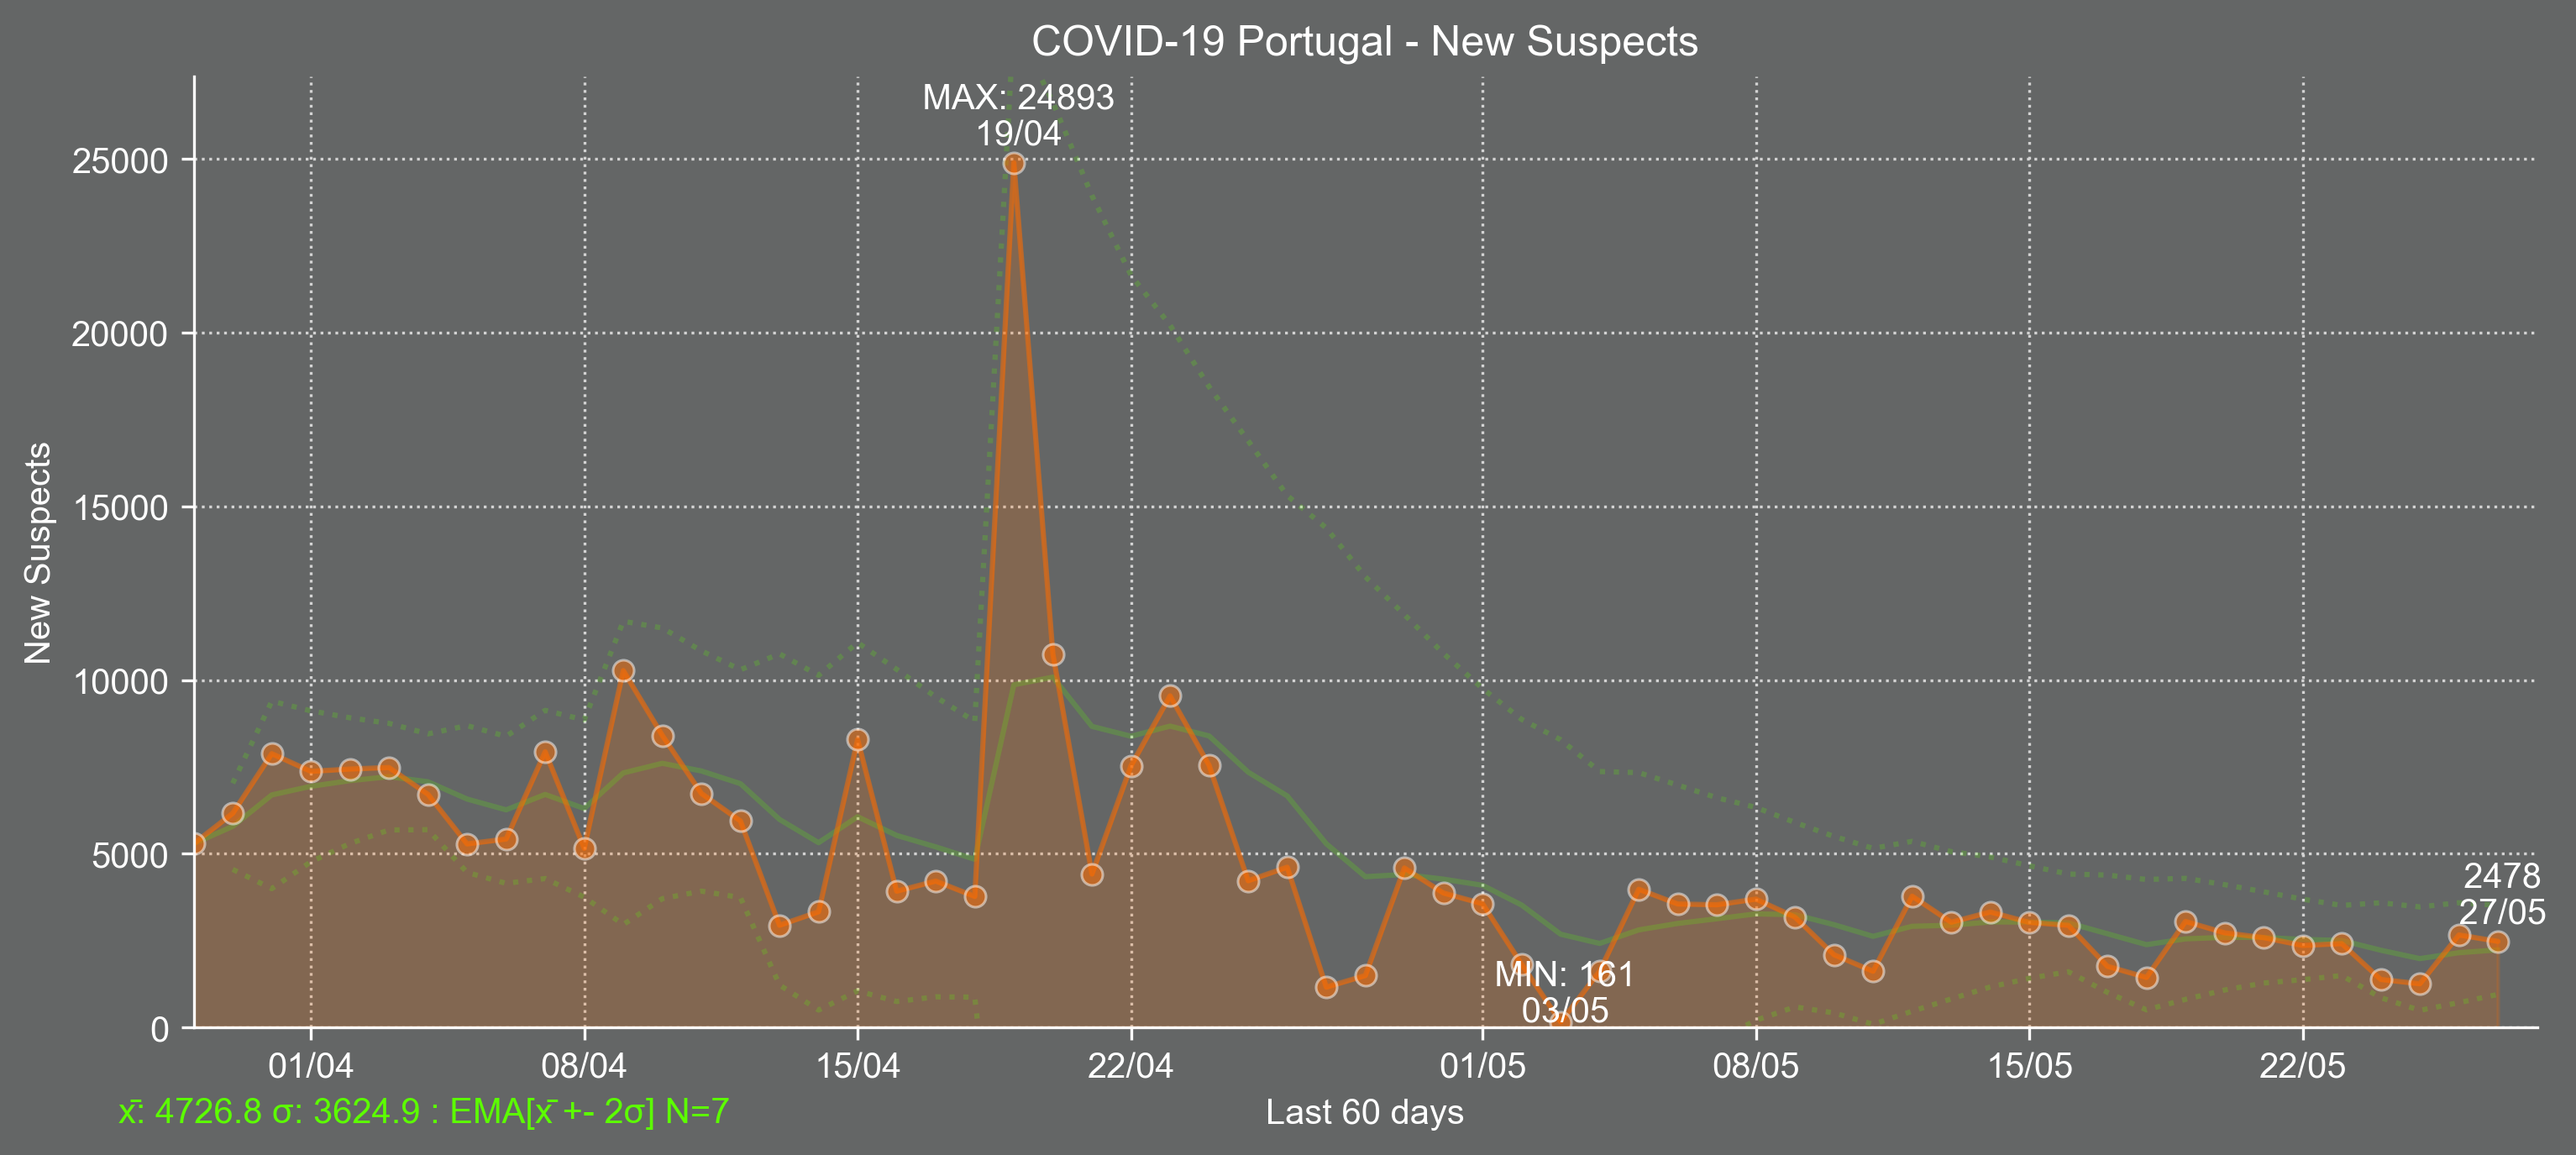

COVID-19 Portugal - New Suspects.png


In [18]:
# Show saved chart images with 300 dpi
import glob
from IPython.display import Image, display
for imageName in glob.glob('{}*.png'.format(s_title)): 
    display(Image(filename=imageName))
    print(imageName)

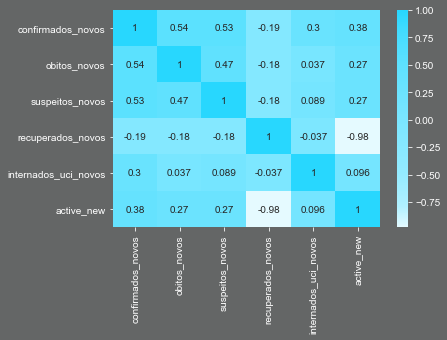

In [19]:
#Check correlation
from matplotlib.colors import LinearSegmentedColormap

boundaries = [0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 1.0]  
hex_colors = sns.light_palette(d_confirmations['color'], n_colors=len(boundaries) * 2 + 2, as_cmap=False).as_hex()
hex_colors = [hex_colors[i] for i in range(0, len(hex_colors), 2)]
colors=list(zip(boundaries, hex_colors))
custom_color_map = LinearSegmentedColormap.from_list(
    name='custom_navy',
    colors=colors,
)

df_latest_corr = df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_icu['key'],d_new_active['key']]].corr()
sns.heatmap(df_latest_corr,annot=True,cmap=custom_color_map)

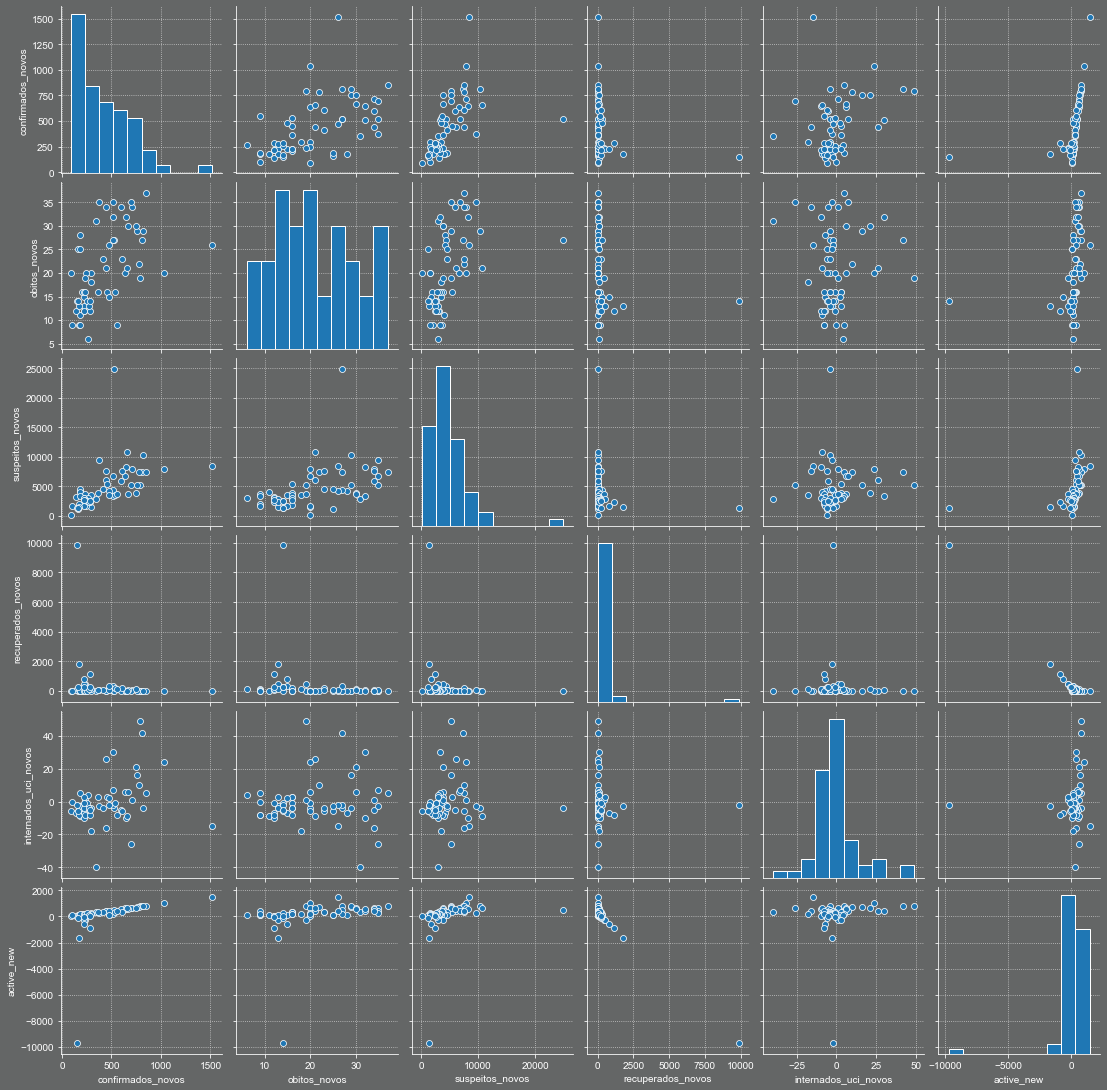

In [20]:
sns.pairplot(df_latest[[d_new_confirmations['key'],d_new_deaths['key'],d_new_suspects['key'],d_new_recoveries['key'],d_new_icu['key'],d_new_active['key']]])